In [6]:
import cv2
import numpy as np
import dlib 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
def display_image(image):
    
    plt.figure(figsize = (12,12))
    plt.imshow(image)
    plt.title(f"Shape : {image.shape}")
    plt.axis("off")
    plt.show()
    
def convert_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

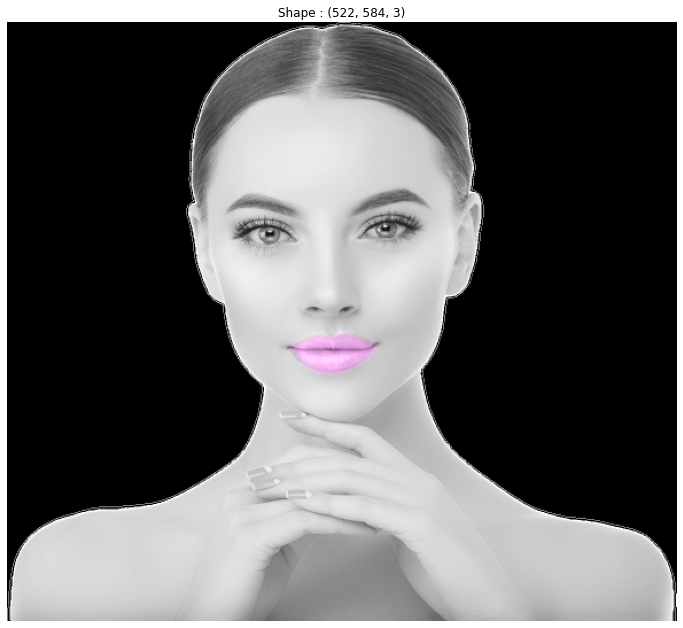

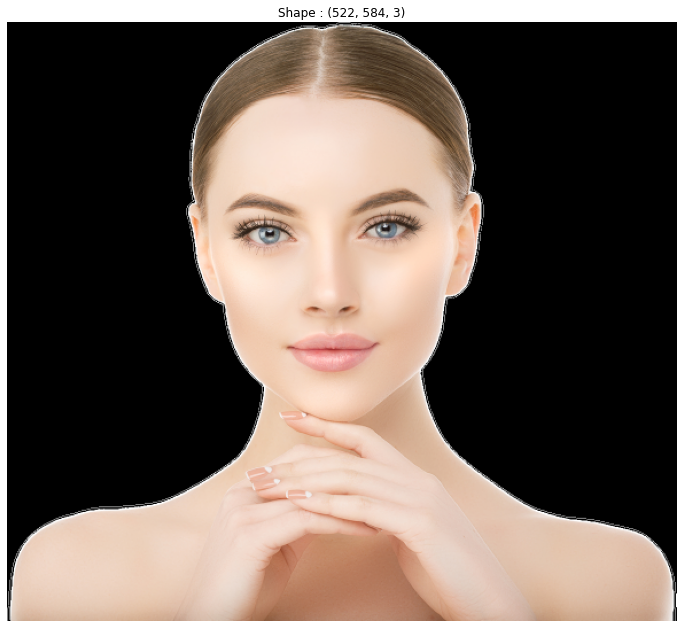

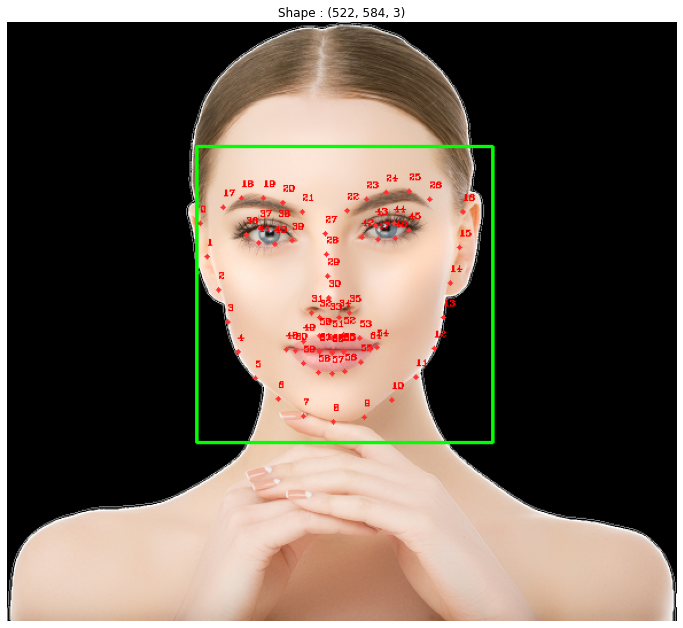

In [8]:
path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/woman.png"
shape_predictor_path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/shape_predictor_68_face_landmarks.dat"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor_path)

def createBox(image,points,scale = 1,masked = False,cropped = True):
    
    points = np.array(points)
    if masked:
        ### Örnek diyelim ki dudak kısmını aldık !!!
        mask = np.zeros_like(image)
        mask = cv2.fillPoly(mask,[points],(255,255,255))

        ### Burda normal resim ile mask olanı çarptık !!!
        ### Ve arka plan siyah dudak kısmı original kaldı !!
        
        image = cv2.bitwise_and(image,mask)
        #display_image(convert_rgb(image))
    
    if cropped:
        
        bbox = cv2.boundingRect(points)
        x,y,w,h = bbox
        imgCrop = image[y:y+h,x:x+w]
        imgCrop = cv2.resize(imgCrop,(0,0),None,scale,scale)
        return imgCrop
      
    else:
        # Sadece dudak kısmı siyah arka dudak beyaz
        return mask
    

img = cv2.imread(path)
img = cv2.resize(img,(0,0),None,0.5,0.5)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgOriginal = img.copy() # üstünde detect işlemleri yapılıcak olan
imgGrap = img.copy() # Resim üzerinde değişikliklerin gösterileceği !!


faces = detector(imgGray)

for face in faces:
    x1,y1,x2,y2 = face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(imgOriginal,(x1,y1),(x2,y2),(0,255,0),2)
    
    landmarks = predictor(imgGray,face)
    
    myPoints = []
    
    for n,point in enumerate(landmarks.parts()):
        
        x = point.x
        y = point.y
        
        myPoints.append([x,y])
        
        cv2.circle(imgOriginal,(x,y),2,(50,50,255),cv2.FILLED)
        cv2.putText(imgOriginal,str(n),(x,y-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.4,(0,0,255),1)
    
    
    #imgEyeBrowLeft = createBox(img, myPoints[17:22])
    #imgEyeBrowRight = createBox(img, myPoints[22:27])
    #imgNose = createBox(img, myPoints[27:36])
    #imgLeftEye = createBox(img, myPoints[36:42])
    #imgRightEye = createBox(img, myPoints[42:48])
    
    imgLips = createBox(img,myPoints[48:61],3,masked = True, cropped = False)
    
    imgColorLips = np.zeros_like(imgLips)
    imgColorLips[:] = 153,0,157
    imgColorLips = cv2.bitwise_and(imgLips,imgColorLips)
    imgColorLips = cv2.GaussianBlur(imgColorLips,(7,7),10)
    
    imgGrapGray = cv2.cvtColor(imgGrap, cv2.COLOR_BGR2GRAY)
    imgGrapGray = cv2.cvtColor(imgGrapGray, cv2.COLOR_GRAY2BGR)
    
    imgColorLips = cv2.addWeighted(imgGrapGray,1,imgColorLips,0.4,0)

    #display_image(convert_rgb(imgLips)) # cv2.imshow("imgLips",imgLips)
    display_image(convert_rgb(imgColorLips)) # cv2.imshow("imgColorLips",imgColorLips)


display_image(convert_rgb(imgGrap))
display_image(convert_rgb(imgOriginal))

cv2.destroyAllWindows()
#cap.release()

In [4]:
import cv2
import numpy as np
import dlib 

path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/woman.png"
shape_predictor_path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/shape_predictor_68_face_landmarks.dat"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor_path)

webcam = True
cap = cv2.VideoCapture(0)
cap.set(3,1080)
cap.set(4,720)

def empty(a):
    pass

cv2.namedWindow("BGR")
cv2.resizeWindow("BGR",640,240)
cv2.createTrackbar("Blue","BGR",0,255,empty)
cv2.createTrackbar("Green","BGR",0,255,empty)
cv2.createTrackbar("Red","BGR",0,255,empty)


def createBox(image,points,scale = 1,masked = False,cropped = True):
    
    points = np.array(points)
    
    if masked:
        ### Örnek diyelim ki dudak kısmını aldık !!!
        mask = np.zeros_like(image)
        mask = cv2.fillPoly(mask,[points],(255,255,255))

        ### Burda normal resim ile mask olanı çarptık !!!
        ### Ve arka plan siyah dudak kısmı original kaldı !!
        image = cv2.bitwise_and(image,mask)
        
        #display_image(convert_rgb(image))
    
    if cropped:
        
        bbox = cv2.boundingRect(points)
        x,y,w,h = bbox
        imgCrop = image[y:y+h,x:x+w]
        imgCrop = cv2.resize(imgCrop,(0,0),None,scale,scale)
        cv2.imwrite("Mask.jpg",imgCrop)
        return imgCrop
      
    else:
        # Sadece dudak kısmı siyah arka dudak beyaz
        return mask
        
while True:
    
    if webcam: con,img = cap.read()
    
    else:img = cv2.imread(path)
    img = cv2.resize(img,(0,0),None,0.6,0.6)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgOriginal = img.copy() # üstünde detect işlemleri yapılıcak olan !!!
    imgGrap = img.copy() # Resim üzerinde değişikliklerin gösterileceği !!!

    faces = detector(imgGray)

    for face in faces:
        x1,y1,x2,y2 = face.left(),face.top(),face.right(),face.bottom()
        #cv2.rectangle(imgOriginal,(x1,y1),(x2,y2),(0,255,0),2)
        landmarks = predictor(imgGray,face)
        myPoints = []

        for n,point in enumerate(landmarks.parts()):

            x = point.x
            y = point.y
            myPoints.append([x,y])

            #cv2.circle(imgOriginal,(x,y),2,(50,50,255),cv2.FILLED)
            #cv2.putText(imgOriginal,str(n),(x,y-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.4,(0,0,255),1)

        if len(myPoints) != 0:
            try:
                imgEyeBrowLeft = createBox(img, myPoints[17:22])
                imgEyeBrowRight = createBox(img, myPoints[22:27])
                imgNose = createBox(img, myPoints[27:36])
                imgLeftEye = createBox(img, myPoints[36:42])
                imgRightEye = createBox(img, myPoints[42:48])
                imgLips = createBox(img, myPoints[48:61])
                #cv2.imshow('Left Eyebrow', imgEyeBrowLeft)
                #cv2.imshow('Right Eyebrow',imgEyeBrowRight)
                #cv2.imshow('Nose',imgNose)
                #cv2.imshow('Left Eye',imgLeftEye)
                #cv2.imshow('Right Eye', imgRightEye)
                #cv2.imshow('Lips', imgLips)

                maskLips = createBox(img,myPoints[48:61],3,masked = True, cropped = False)
                imgColorLips = np.zeros_like(maskLips)

                b = cv2.getTrackbarPos("Blue","BGR")
                g = cv2.getTrackbarPos("Green","BGR")
                r = cv2.getTrackbarPos("Red","BGR")

                imgColorLips[:] = b,g,r
                imgColorLips = cv2.bitwise_and(maskLips,imgColorLips)
                imgColorLips = cv2.GaussianBlur(imgColorLips,(7,7),10)

                imgGrapGray = cv2.cvtColor(imgGrap, cv2.COLOR_BGR2GRAY)
                imgGrapGray = cv2.cvtColor(imgGrapGray, cv2.COLOR_GRAY2BGR)

                imgColorLips = cv2.addWeighted(imgGrapGray,1,imgColorLips,0.4,0)

                #cv2.imshow("imgLips",imgLips)
                cv2.imshow("BGR",imgColorLips)
            
            except:
                pass

    #cv2.imshow("imgOriginal",imgOriginal)
    #cv2.imshow("BGR",np.hstack([imgColorLips,imgGrap]))
    cv2.imshow("Original",imgOriginal)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()
cap.release()